# Time series analysis (MSAP4-02)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import star_privateer as sp
import plato_msap4_demonstrator_datasets.plato_sim_dataset as plato_sim_dataset

## K2: Preprocessing

This first part include preprocessing tasks that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

In [3]:
t, s0, dt = sp.load_k2_example ()

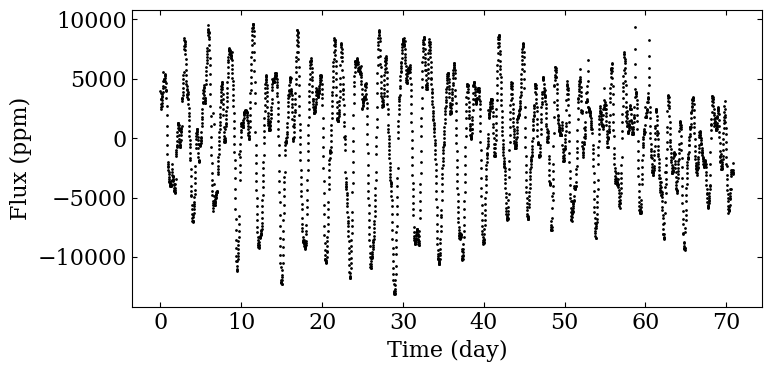

In [4]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s0!=0]-t[0], s0[s0!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

plt.savefig ('figures/k2_lc.png', dpi=300)

In [5]:
pcutoff = 60
pthresh = 60

## K2: Rotation period analysis

In the next step, we compute the ACF and we analyse the characteristic periodicities obtained from the function, considering only periods below $P_\mathrm{cutoff}$.

ACF was smoothed with a period 0.26 days


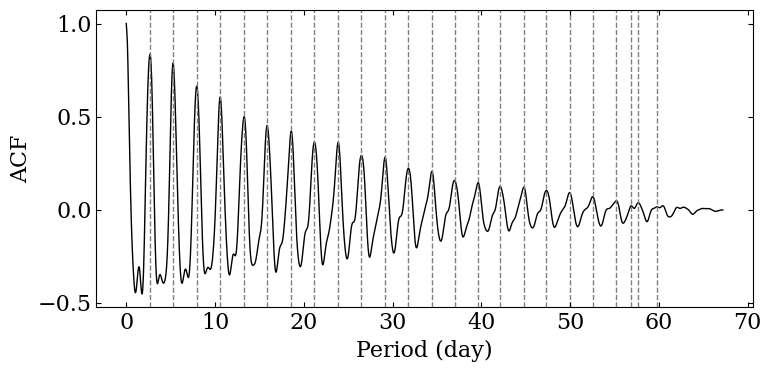

In [6]:
p_acf, acf = sp.compute_acf (s0, dt, normalise=True,
                                use_scipy_correlate=True, smooth=True, verbose=True)
_, _, _, _, prots, hacf, gacf = sp.find_period_acf (p_acf, acf, pcutoff=pcutoff)
fig = sp.plot_acf (p_acf, acf, prot=prots, filename='figures/acf_k2.png')

We can take a look at the values we have extracted from the ACF. Most often, the rotation period can be linked to the first value of the ``prots`` array.

In [7]:
prots[0], hacf[0], gacf[0]

(2.6765510971308686, 1.2594916191360066, 0.8353126108493093)

Finally we create the intermediate data product.

In [8]:
IDP_SAS_ACF_FILT_TIMESERIES = np.c_[p_acf, acf]
IDP_SAS_PROT_TIMESERIES = np.c_[prots, np.full (prots.size, -1), np.full (prots.size, -1),
                                hacf, gacf, np.arange (prots.size)+1]
np.savetxt ('data_products/IDP_SAS_PROT_TIMESERIES_K2.dat', 
            IDP_SAS_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_SAS_ACF_FILT_TIMESERIES_K2.dat', 
            IDP_SAS_ACF_FILT_TIMESERIES)
df = pd.DataFrame (data=IDP_SAS_PROT_TIMESERIES)
df

0    1    2         3         4     5
0    2.676551 -1.0 -1.0  1.259492  0.835313   1.0
1    5.271375 -1.0 -1.0  1.180853  0.786927   2.0
2    7.947927 -1.0 -1.0  1.017210  0.664006   3.0
3   10.583614 -1.0 -1.0  0.940327  0.605458   4.0
4   13.280597 -1.0 -1.0  0.771528  0.499477   5.0
5   15.875421 -1.0 -1.0  0.768302  0.452141   6.0
6   18.592836 -1.0 -1.0  0.741704  0.421836   7.0
7   21.187660 -1.0 -1.0  0.663556  0.363392   8.0
8   23.884643 -1.0 -1.0  0.641628  0.362309   9.0
9   26.499899 -1.0 -1.0  0.551047  0.292327  10.0
10  29.156018 -1.0 -1.0  0.524945  0.282007  11.0
11  31.791706 -1.0 -1.0  0.440642  0.222855  12.0
12  34.427394 -1.0 -1.0  0.392308  0.206277  13.0
13  36.981355 -1.0 -1.0  0.314554  0.157428  14.0
14  39.637474 -1.0 -1.0  0.276499  0.145753  15.0
15  42.109708 -1.0 -1.0  0.240641  0.126138  16.0
16  44.786260 -1.0 -1.0  0.226810  0.121512  17.0
17  47.340221 -1.0 -1.0  0.199173  0.103533  18.0
18  49.955477 -1.0 -1.0  0.184646  0.092344  19.0
19  52.550301 -1.0 -1.0  0.159305  0.070555  20.0
20  55.226852 -1.0 -1.0  0.127831  0.048245  21.0
21  56.902250 -1.0 -1.0  0.053345  0.021313  22.0
22  57.678655 -1.0 -1.0  0.066281  0.038367  23.0
23  59.783118 -1.0 -1.0  0.042232  0.016017  24.0

In [9]:
df.to_latex (buf='data_products/idp_msap4_02_idp_prot_timeseries.tex', 
             formatters=['{:.2f}'.format, '{:.0f}'.format, '{:.0f}'.format,
                         '{:.2f}'.format, '{:.2f}'.format, '{:.0f}'.format,],  
             index=False, header=False)

Note that, due to the short length of this light curve, we do not show for this first case the analysis of long term modulations.

## PLATO simulation: Preprocessing

This first part include preprocessing tasks that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

In [10]:
filename = sp.get_target_filename (plato_sim_dataset, '040', filetype='csv')
t, s0, dt = sp.load_resource (filename)

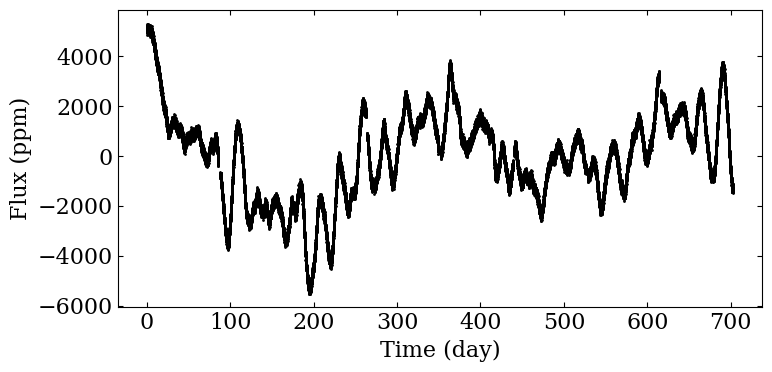

In [11]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s0!=0]-t[0], s0[s0!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()


plt.savefig ('figures/plato_lc.png', dpi=300)

In [12]:
s = sp.preprocess (t, s0, cut=60)
pcutoff = 60
pthresh = 60

## PLATO simulation: Rotation period analysis

This first part include preprocessing task that are not actually included in MSAP4-02 but are useful for the subsequent analysis.

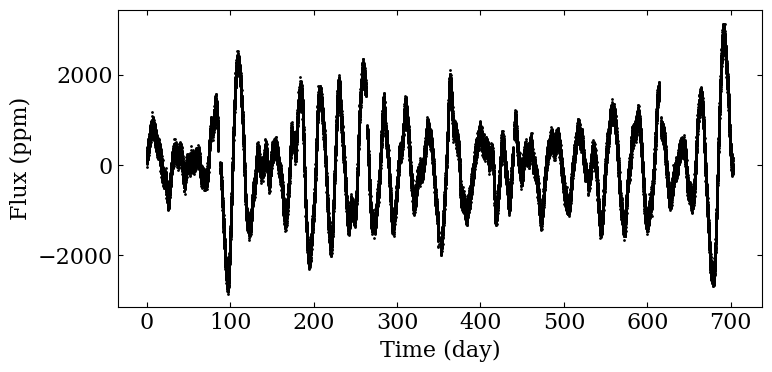

In [13]:
fig, ax = plt.subplots (1, 1, figsize=(8,4))

ax.scatter (t[s!=0]-t[0], s[s!=0], color='black', 
            marker='o', s=1)

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

fig.tight_layout ()

plt.savefig ('figures/plato_lc_filtered.png', dpi=300)

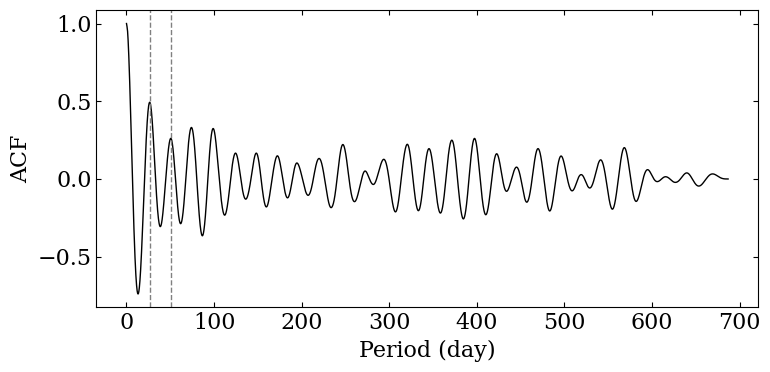

In [14]:
p_acf, acf = sp.compute_acf (s, dt, normalise=True,
                                use_scipy_correlate=True, smooth=True)
_, _, _, _, prots, hacf, gacf = sp.find_period_acf (p_acf, acf, pcutoff=pcutoff)
fig = sp.plot_acf (p_acf, acf, prot=prots, filename='figures/acf_plato_short.png')

In [15]:
IDP_SAS_ACF_FILT_TIMESERIES = np.c_[p_acf, acf]
IDP_SAS_PROT_TIMESERIES = np.c_[prots, np.full (prots.size, -1), np.full (prots.size, -1),
                                hacf, gacf, np.arange (prots.size)+1]
np.savetxt ('data_products/IDP_SAS_PROT_TIMESERIES_PLATO.dat', 
            IDP_SAS_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_SAS_ACF_FILT_TIMESERIES_PLATO.dat', 
            IDP_SAS_ACF_FILT_TIMESERIES)

## PLATO simulation: Long term modulation analysis

This time, we do not consider filtered out the data in order to consider long term modulations. We put a period threshold at 90 days to consider only long period in the postprocessing of our analysis.

ACF was smoothed with a period 30.00 days


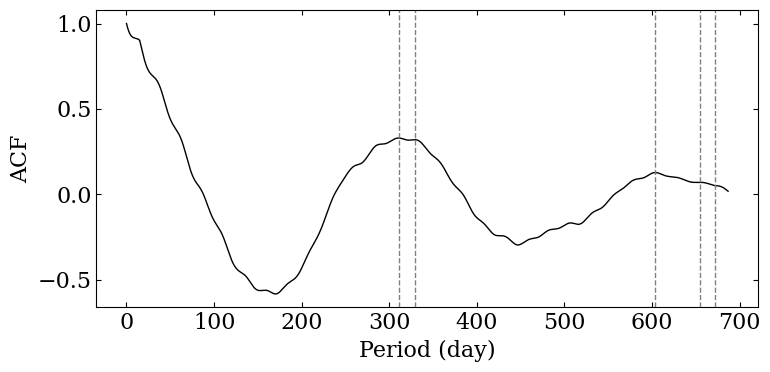

In [16]:
p_acf, acf = sp.compute_acf (s0, dt, normalise=True, pthresh=pthresh, smooth_period=30,
                                use_scipy_correlate=True, smooth=True, verbose=True)
_, hacf, gacf, _, pmods, hacf, gacf = sp.find_period_acf (p_acf, acf, pthresh=pthresh)
fig = sp.plot_acf (p_acf, acf, prot=pmods, filename='figures/acf_plato_long.png')

In [17]:
IDP_SAS_ACF_TIMESERIES = np.c_[p_acf, acf]
IDP_SAS_LONGTERM_MODULATION_TIMESERIES = np.c_[pmods, np.full (pmods.size, -1), np.full (pmods.size, -1),
                                                                hacf, gacf, np.arange (pmods.size)+1]
np.savetxt ('data_products/IDP_SAS_LONGTERM_MODULATION_TIMESERIES_PLATO.dat', 
            IDP_SAS_PROT_TIMESERIES)
np.savetxt ('data_products/IDP_SAS_ACF_TIMESERIES_PLATO.dat', 
            IDP_SAS_ACF_TIMESERIES)
df = pd.DataFrame (data=IDP_SAS_LONGTERM_MODULATION_TIMESERIES)
df

0    1    2         3         4    5
0  310.678567 -1.0 -1.0  0.462692  0.329725  1.0
1  328.845118 -1.0 -1.0  0.282649  0.320247  2.0
2  603.628081 -1.0 -1.0  0.180539  0.127609  3.0
3  654.579144 -1.0 -1.0  0.010281  0.070637  4.0
4  671.849867 -1.0 -1.0 -1.000000  0.050842  5.0

In [18]:
df.to_latex (buf='data_products/idp_msap4_02_idp_longterm_modulation_timeseries.tex', 
             formatters=['{:.2f}'.format, '{:.0f}'.format, '{:.0f}'.format,
                         '{:.2f}'.format, '{:.2f}'.format, '{:.0f}'.format,],  
             index=False, header=False)